In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import random

# Define Coordinate and Require of pokeballs

In [2]:
#定義座標 X
x = np.array([82, 96, 50, 49, 13, 29, 58, 84, 14, 2, 3, 5, 98, 84, 61, 1, 88, 91, 19, 93, 50, 98, 5, 42, 61, 9, 80, 57, 23, 20, 85, 98])
#定義座標 Y
y = np.array([76, 44, 5, 8, 7, 89, 30, 39, 24, 39, 82, 10, 52, 25, 59, 65, 51, 2, 32, 3, 93, 14, 42, 9, 62, 97, 55, 69, 15, 70 ,60, 5])
#定義各座標的寶可夢球需求數量
requireball = [0, 19, 21, 6, 19, 7, 12, 16, 6, 16, 8, 14, 21, 16, 3, 22, 18, 19, 1, 24, 8, 12, 4, 8, 24, 24, 2, 20, 15, 2, 14, 9]

# Coordinate of Pokemon(blue) and Home(red)

<function matplotlib.pyplot.show(close=None, block=None)>

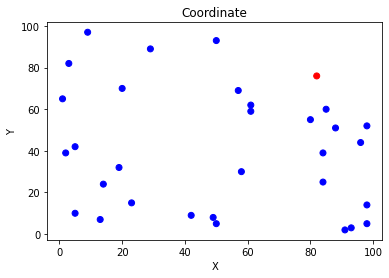

In [3]:
#畫出座標圖 (紅點為小明家)
plt.scatter(x, y, color = ["red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordinate')
plt.show

# Euclidean Distance Matrix

In [4]:
#建立歐幾里德距離矩陣
matrix = 32

d = np.zeros((matrix,matrix), dtype = int)

for i in range(matrix):
    for j in range(matrix):
        d[i,j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

print(d)

[[  0  34  77 ...  62  16  72]
 [ 34   0  60 ...  80  19  39]
 [ 77  60   0 ...  71  65  48]
 ...
 [ 62  80  71 ...   0  65 101]
 [ 16  19  65 ...  65   0  56]
 [ 72  39  48 ... 101  56   0]]


# Initial Solutions (Routes)

In [5]:
#定義初始解數量
popsize = 100
#定義迭代次數
gen = 4000
#定義菁英父母數量
parentsize = 25
#建立可行解存放列表
available = []
#建立距離存放列表
distance = []

#生成 100條初始解
for k in range(popsize):
    
    #定義可用球數
    countpokeball = 100
    #建立路線暫存列表(點位不包含回小明家)(後續交配/突變用)(進入迴圈時需做清除原有內容，故建立在迴圈內)
    xiaomin = []
    #建立路線暫存列表(含從小明家出發 + 回小明家)(後續計算距離(適性質)用)
    calxiaomin = [0]
    
    #路線暫存列表存至36個數字後停止(原31個點位 + 起點小明家1個點位 + 中間補球4個點位)
    while len(calxiaomin) < 37: 
        #變數r = 從1-31的隨機整數(即座標點位)
        r = random.randint(1,31)
        #限制條件 變數r在路線暫存列表內不重複
        if r not in xiaomin:
            #計算可用球數是否足夠繼續到下一個點抓寶
            #限制條件 可用球數可滿足需求球數
            if countpokeball - requireball[r] >= 0:
                countpokeball -= requireball[r]
                #可用球數 - 座標需求球數後 新增至路線暫存列表
                xiaomin.append(r)
                calxiaomin.append(r)
            #限制條件 可用球數不滿足需求球數
            else:
                #路線暫存列表(含小明家的那條)補0(回小明家)
                calxiaomin.append(0)
                #將可用球數重新補回100顆
                countpokeball = 100
                countpokeball -= requireball[r]
                #可用球數 - 座標需求球數後 新增至路線暫存列表
                xiaomin.append(r)
                calxiaomin.append(r)
        #限制條件 因補滿31個點位後 迴圈第37輪會沒有隨機整數可補 必須強制跳出迴圈
        if len(calxiaomin) == 36:
            break
    #最後再將路線暫存列表(含小明家的那條)補上0(回小明家(終點))
    calxiaomin += [0]
    #變數dis 用於計算距離(適性值)
    dis = 0
    #提取路線暫存列表點位
    if calxiaomin != []:
        #跑36段的點位距離加總
        for l in range(len(calxiaomin)-1):
            #定義路線起點和終點 EX:[index[0]=起點,index[1]=終點]
            #下一輪則是[index[1]=起點,index[2]=終點]
            start = calxiaomin[l-1]
            end = calxiaomin[l]
            #從歐幾里德距離矩陣查表後做距離加總
            dis += int(d[start,end])
    #路線暫存列表(不含小明家)新增至可行解存放列表內
    available.append(xiaomin)
    #距離(適性值)新增至距離存放列表內
    distance.append(dis)
    
    #可行解存放列表 和 距離存放列表 可互相對應位置，因兩者同時新增，所以Index會一樣
    
    #印出路線和距離
    print(f"第{k+1}條路線:{calxiaomin}")
    print(f"總消耗距離:{dis}\n")

第1條路線:[0, 29, 5, 12, 15, 10, 11, 8, 31, 14, 0, 4, 28, 13, 19, 6, 3, 0, 24, 30, 20, 22, 25, 1, 18, 0, 7, 2, 27, 9, 21, 0, 16, 23, 17, 26, 0]
總消耗距離:1914

第2條路線:[0, 20, 17, 5, 7, 19, 8, 0, 24, 28, 16, 29, 21, 6, 11, 0, 25, 13, 18, 9, 26, 22, 27, 0, 15, 31, 14, 1, 12, 23, 3, 0, 2, 10, 30, 4, 0]
總消耗距離:2340

第3條路線:[0, 14, 15, 19, 18, 7, 3, 26, 31, 11, 0, 1, 13, 17, 25, 12, 0, 20, 22, 23, 2, 10, 5, 28, 27, 0, 21, 6, 24, 29, 16, 8, 9, 0, 30, 4, 0]
總消耗距離:2001

第4條路線:[0, 20, 7, 22, 18, 14, 5, 16, 15, 21, 0, 28, 26, 19, 6, 1, 2, 0, 4, 9, 23, 11, 29, 25, 0, 12, 27, 24, 8, 10, 30, 0, 31, 17, 3, 13, 0]
總消耗距離:1885

第5條路線:[0, 22, 3, 23, 11, 24, 10, 15, 14, 0, 25, 12, 20, 19, 7, 0, 27, 13, 21, 8, 30, 6, 16, 18, 0, 28, 1, 29, 9, 5, 4, 2, 0, 26, 17, 31, 0]
總消耗距離:1925

第6條路線:[0, 19, 23, 25, 3, 10, 2, 0, 16, 11, 17, 15, 30, 22, 29, 0, 27, 12, 8, 28, 1, 20, 31, 0, 7, 26, 4, 13, 9, 21, 5, 0, 24, 6, 18, 14, 0]
總消耗距離:2315

第7條路線:[0, 14, 26, 5, 30, 2, 28, 3, 17, 0, 13, 29, 6, 20, 1, 27, 7, 0, 9, 11, 31, 12, 10,

# Elitism Parents

In [6]:
#複製距離存放列表(用來排序大小) 不用原距離存放列表是為了不要打亂Index
distance2 = deepcopy(distance)
#距離由小至大排序
distance2.sort()
#建立父母存放列表
parent = []
#跑100次，因距離一樣時，透過距離值回推 原距離存放列表的Index再對應回 可行解存放列表，程式會發生抓到同一條可行解的狀況
#所以如果有重複值就抓下一條
for m in range(popsize):
    #限制條件 判定路線否重複
    if available[distance.index(distance2[m])] not in parent:
        #可行解路線新增至父母存放列表內
        parent.append(available[distance.index(distance2[m])])
    #滿足菁英父母數量後停止
    if len(parent) == parentsize:
        break

#印出排序後距離和菁英父母路線
print(f"初始解依距離最短排序為:{distance2}\n")
print("初始解最短路徑排序")
for n in range(parentsize):
    print(f"路徑為:{parent[n]}\n")

初始解依距離最短排序為:[1718, 1727, 1818, 1856, 1856, 1863, 1871, 1881, 1881, 1884, 1885, 1893, 1895, 1895, 1899, 1899, 1913, 1914, 1915, 1918, 1919, 1925, 1940, 1947, 1950, 1955, 1961, 1967, 1969, 1972, 1974, 1982, 1989, 1990, 1992, 1994, 2001, 2001, 2002, 2010, 2011, 2013, 2013, 2021, 2022, 2026, 2029, 2029, 2036, 2044, 2044, 2045, 2052, 2060, 2061, 2061, 2063, 2063, 2065, 2065, 2076, 2078, 2087, 2089, 2096, 2096, 2100, 2104, 2118, 2118, 2125, 2135, 2137, 2137, 2139, 2148, 2148, 2148, 2149, 2155, 2162, 2163, 2169, 2188, 2190, 2207, 2220, 2220, 2222, 2236, 2239, 2241, 2255, 2257, 2257, 2264, 2284, 2315, 2340, 2345]

初始解最短路徑排序
路徑為:[14, 2, 11, 15, 25, 12, 23, 19, 27, 18, 30, 28, 4, 3, 7, 5, 29, 24, 16, 26, 10, 8, 1, 20, 21, 13, 9, 22, 31, 17, 6]

路徑為:[17, 12, 21, 30, 24, 31, 22, 26, 9, 11, 23, 7, 15, 13, 1, 4, 28, 2, 3, 14, 19, 27, 5, 20, 25, 8, 18, 29, 10, 16, 6]

路徑為:[13, 22, 9, 3, 1, 19, 5, 26, 28, 30, 29, 20, 27, 8, 21, 14, 16, 7, 18, 31, 17, 25, 10, 15, 24, 4, 11, 6, 2, 12, 23]

路徑為:[16, 22, 

# Genetic Algorithm

In [7]:
#定義突變率
mutation_rate = 0.1
#定義交配率
crossover_rate = 0.8
#定義最佳距離(先設很大，逐步將其更新至最小距離)
bestdis = 10000000
#建立最佳路徑列表
bestroute = []
#建立迭代次數列表(用於繪製收斂圖)
genforplot = []
#建立每次迭代最佳距離列表(用於繪製收斂圖)
disforplot = []
#執行迭代
for t in range(gen):
    #計算可行解是否執行交配和突變
    for o in range(popsize):
        #建立菁英父母副本(用於交配的運算/組合(用於移除座標))(進入迴圈時需做清除原有內容，故建立在迴圈內)
        parent_smd = []
        parent_smd = deepcopy(parent)
        #變數r_cross = 介於0-1的隨機小數(用來判別是否執行交配(小於交配率時交配))
        r_cross = random.random()
        #變數r_mutate = 介於0-1的隨機小數(用來判別是否執行突變(小於突變率時突變))
        r_mutate = random.random()
        #限制條件 若滿足需交配時
        if r_cross < crossover_rate:
            #建立選擇菁英父母的Index暫存列表(進入迴圈時需做清除原有內容，故建立在迴圈內)
            parentnum = []
            #變數 parentnum = 從0-24取兩個不重複的隨機整數 作為菁英父母的Index
            parentnum = random.sample(range(0,len(parent)-1),2)
            #將兩個隨機整數指派給 變數 parent_index 和 變數 child_index
            parent_index = parentnum[0]
            child_index = parentnum[1]
            #變數 crossloc = 從1-29取一個隨機整數作為交配位置，至少可保留路徑中的第一個座標
            crossloc = random.randint(1,29)
            
            #將母親路線內交配位置後方座標個別提出後再於父親路線內移除的次數
            for p in range(31-crossloc):
                #限制條件 若父母兩條長的不一樣才可交配
                if parent_smd[child_index] != parent_smd[parent_index]:
                    #變數 deleted = 母親路線內交配位置後的座標(含交配位置)
                    deleted = parent_smd[child_index][int(p + crossloc)]
                    #父親路線內將母親路線內交配位置後的座標移除
                    parent_smd[parent_index].remove(deleted)
                #限制條件 若父母兩條長一樣則跳出迴圈
                else:
                    break
            #建立子代路線暫存列表(進入迴圈時需做清除原有內容，故建立在迴圈內)
            temp = []
            #將父母路線進行交配後存入子代路線暫存列表
            temp = parent_smd[parent_index] + parent_smd[child_index][crossloc:]
            #定義可用球數
            ballcount = 100
            #複製子代暫存列表(補上小明家用來計算距離)
            temp_dis = deepcopy(temp)
            #子代路線暫存列表插入起點(小明家)
            temp_dis.insert(0,0)
            #計算可用球數是否足夠繼續到下一個點抓寶
            for q in range(len(temp)):
                #限制條件 可用球數可滿足需求球數
                if ballcount - requireball[int(temp[q])] >= 0:
                    #可用球數 - 當前座標需求球數
                    ballcount -= requireball[int(temp[q])]
                #限制條件 可用球數不滿足需求球數
                else:
                    #當前Index補0(回小明家)
                    temp_dis.insert(q,0)
                    #將可用球數重新補回100顆
                    ballcount = 100
                    #可用球數 - 當前座標需求球數
                    ballcount -= requireball[int(temp[q])]
            
            #最後再將子代路線暫存列表 補上0(回小明家(終點))            
            temp_dis += [0]
            #變數dis 用於計算子代路線距離(適性值)
            dis = 0
            #提取子代路線暫存列表點位
            if temp_dis != []:
                #定義路線起點和終點 EX:[index[0]=起點,index[1]=終點]
                #下一輪則是[index[1]=起點,index[2]=終點]
                for s in range(len(temp_dis)):
                    #限制條件 點為執行到Index[36]=終點後結束
                    if s == len(temp_dis)-1:
                        break
                    start = temp_dis[s]
                    end = temp_dis[s+1]
                    #從歐幾里德距離矩陣查表後做距離加總
                    dis += int(d[start,end])
            #尋找最佳距離(最佳解)
            #限制條件 若子代路線距離小於目前最佳距離就作為新的最佳距離
            if bestdis > dis:
                bestdis = dis
                #建立最佳路線列表(進入迴圈時需做清除原有內容，故建立在迴圈內)
                bestroute = []
                #將子代路線指派為最佳路線列表
                bestroute = temp_dis
            #限制條件 若子代距離小於該Index目前距離就將該Index目前距離取代為子代距離
            if dis < distance[o]:
                #取代距離存放列表
                distance.remove(distance[o])
                distance.insert(o,dis)
                #取代可行解存放列表
                available.remove(available[o])
                available.insert(o,temp)
        
        #建立菁英父母副本(將菁英父母副本恢復原先狀態(上面已經過交配的變動))
        #雖一進入迴圈會恢復一次，但若到為最後一輪迴圈會沒有恢復到，所以這邊需多建立一次
        #前面偏像單純建立運算用列表，此處偏向恢復原先狀態
        parent_smd = []
        parent_smd = deepcopy(parent)
             
        #限制條件 若滿足需突變時
        if r_mutate < mutation_rate:
            #建立突變座標列表
            mutatenum = []
            #變數 mutatenum = 從0-30取兩個不重複的隨機整數 作為突變位置
            mutatenum = random.sample(range(0,30),2)
            #限制條件 將兩個隨機整數排序 數字小的在前 大的在後
            #需要將兩個座標移除後，小的座標先補，再補大的座標，座標交換順序才不會亂
            if mutatenum[0] < mutatenum[1]:
                #將數字小的指派給mutate_index1
                mutate_index1 = mutatenum[0]
                #將數字大的指派給mutate_index2
                mutate_index2 = mutatenum[1]
            else:
                mutate_index1 = mutatenum[1]
                mutate_index2 = mutatenum[0]
            
            #建立突變用交換座標暫存列表
            mutate_remove_temp = []
            #建立可行解副本(用於處理突變交換位置)
            available_smd = deepcopy(available)
            #將要交換位置的兩個座標存入 交換座標暫存列表
            #直接移除不先提取出來的話，後續會在可行解暫存列表內在有找不到值的情況
            mutate_remove_temp.append(available_smd[o][mutate_index1])
            mutate_remove_temp.append(available_smd[o][mutate_index2])
            #移除要交換的兩個座標
            available_smd[o].remove(mutate_remove_temp[0])
            available_smd[o].remove(mutate_remove_temp[1])
            #插入交換的兩個座標回對調位置(完成突變)
            available_smd[o].insert(mutate_index1,mutate_remove_temp[1])
            available_smd[o].insert(mutate_index1,mutate_remove_temp[0])
            
            #建立子代路線暫存列表
            temp = []
            #將突變後的子代路線存入
            temp = available_smd[o]
            #定義可用球數
            ballcount = 100
            #複製子代暫存列表(補上小明家用來計算距離)
            temp_dis = deepcopy(temp)
            #子代路線暫存列表插入起點(小明家)
            temp_dis.insert(0,0)
            #計算可用球數是否足夠繼續到下一個點抓寶(同交配，故不再註解)
            for v in range(len(temp)):
                if ballcount - requireball[int(temp[v])] >= 0:
                    ballcount -= requireball[int(temp[v])]
                else:
                    temp_dis.insert(v,0)
                    ballcount = 100
                    ballcount -= requireball[int(temp[v])]
            
            #最後再將子代路線暫存列表 補上0(回小明家(終點))         
            temp_dis += [0]
            #變數dis 用於計算子代路線距離(適性值)
            dis = 0
            #提取子代路線暫存列表點位(同交配，故不再註解)
            if temp_dis != []:
                for w in range(len(temp_dis)):
                    if w == len(temp_dis)-1:
                        break
                    start = temp_dis[w]
                    end = temp_dis[w+1]
                    dis += int(d[start,end])
            #尋找最佳距離(最佳解)
            #限制條件 若子代路線距離小於目前最佳距離就作為新的最佳距離(同交配，故不再註解)
            if bestdis > dis:
                bestdis = dis
                bestroute = []
                bestroute = temp_dis
            #限制條件 若子代距離小於該Index目前距離就將該Index目前距離取代為子代距離(同交配，故不再註解)
            if dis < distance[o]:
                distance.remove(distance[o])
                distance.insert(o,dis)
                available.remove(available[o])
                available.insert(o,temp) 
    
    #新增該次迭代至迭代次數列表
    genforplot.append(t)
    #新增該次迭代中的最佳距離至每次迭代最佳距離列表
    disforplot.append(bestdis)
    
    #重新排列順序以選出新的菁英父母(在下次迭代時使用)
    #清空複製的距離存放列表
    distance2 = []
    #複製距離存放列表
    distance2 = deepcopy(distance)
    #距離由小至大排序
    distance2.sort()
    #清空父母存放列表
    parent = []
    #重新加入新排序的菁英父母
    for u in range(parentsize):
        parent.append(available[distance.index(distance2[u])])

In [8]:
#印出最佳距離和對應的最佳路徑
print(bestdis)
print(bestroute)

949
[0, 22, 9, 18, 8, 11, 4, 28, 23, 3, 14, 0, 20, 5, 25, 10, 15, 29, 0, 30, 1, 31, 19, 13, 0, 12, 16, 6, 7, 0, 27, 24, 2, 17, 21, 26, 0]


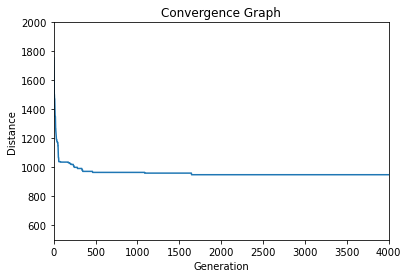

In [9]:
#繪製收斂圖
plt.plot(genforplot,disforplot)
plt.title("Convergence Graph")
plt.xlabel("Generation")
plt.ylim([500, 2000])
plt.xlim([0, 4000])
plt.ylabel("Distance")
plt.show()